In [53]:
from PIL import Image
import numpy
import matplotlib.pyplot as plt
import math
import random

In [2]:
#Tile setings
name_image = "data/mini.png"
first_image = Image.open(name_image)
scale = 10
step_im = 3
lpr = 0
tpb = 0

#New image setings
name = "NewImage{}.png"
size = [50, 50] # y, x
startpix = [math.floor(step_im / 2), size[0] - math.ceil(step_im / 2)] # y, x
old_map_start = [0, first_image.size[1] - step_im]

In [3]:
class AvalibleTile:
    def __init__(self, tile):
        self.at = list(range(tile))
    
    def deleteAT(self, tile):
        self.at.remove(tile)
    
    def clearAT(self, tile):
        self.at = [tile]

In [166]:
class TileCouple:
    def __init__(self, tiles):
        self.tiles = tiles
        self.tile_count = len(tiles)
        self.tile_couple = {}
    
    def serch(self,
              left_tile= -1,
              right_tile= -1,
              bottom_tile= -1,
              top_tile= -1):
        if (left_tile, right_tile, bottom_tile, top_tile) in self.tile_couple:
            return self.tile_couple[(left_tile,
                                     right_tile,
                                     bottom_tile,
                                     top_tile)]
        else:
            return self.append(left_tile,
                        right_tile,
                        bottom_tile,
                        top_tile)
    
    def append(self,
               left_tile= -1,
               right_tile= -1,
               bottom_tile= -1,
               top_tile= -1):
        if left_tile != -1 and right_tile != -1 and bottom_tile != -1 and top_tile != -1:
            self.tile_couple[(left_tile,
                              right_tile,
                              bottom_tile,
                              top_tile)] = [random.randrange(100)] # условие
            return self.tile_couple[(left_tile,
                                     right_tile,
                                     bottom_tile,
                                     top_tile)]
        else:
            add_tile_left = []
            add_tile_right = []
            add_tile_bottom = []
            add_tile_top = []
            new_tile = []
            for i in range(self.tile_count):
                if left_tile == -1:
                    add_tile_left += self.serch(i, right_tile, bottom_tile, top_tile)
                elif right_tile == -1:
                    add_tile_right += self.serch(left_tile, i, bottom_tile, top_tile)
                elif bottom_tile == -1:
                    add_tile_bottom  += self.serch(left_tile, right_tile, i, top_tile)
                elif top_tile == -1:
                    add_tile_top += self.serch(left_tile, right_tile, bottom_tile, i)

            for i in add_tile_left:
                if i not in new_tile:
                    new_tile.append(i)
            for i in add_tile_right:
                if i not in new_tile:
                    new_tile.append(i)
            for i in add_tile_bottom:
                if i not in new_tile:
                    new_tile.append(i)
            for i in add_tile_top:
                if i not in new_tile:
                    new_tile.append(i)
            self.tile_couple[(left_tile,
                              right_tile,
                              bottom_tile,
                              top_tile)] = new_tile
            return new_tile
            
            
    def outConection(self):
        for i in self.tile_couple:
            print(i, ":", end=" ")
            for i2 in self.tile_couple[i]:
                print(i2, end=",")
            print()

class Tile:
    def __init__(self):
        self.tile = []
        self.tile_couple = []
        self.tile.append(-1)
        self.tile_couple.append([[0]])
    
    def append(self, tile_set,
               left_tile= -1,
               right_tile= -1,
               bottom_tile= -1,
               top_tile= -1):
        pass

In [167]:
my_couple = TileCouple(mass_crop)

In [168]:
print(my_couple.tile_count)
my_couple.serch(-1, -1, -1, -1)



25


[47,
 10,
 6,
 15,
 22,
 2,
 95,
 71,
 97,
 17,
 42,
 94,
 51,
 18,
 87,
 39,
 54,
 14,
 58,
 45,
 91,
 89,
 76,
 1,
 88,
 55,
 44,
 4,
 11,
 26,
 23,
 32,
 5,
 59,
 8,
 81,
 52,
 60,
 86,
 90,
 85,
 57,
 50,
 67,
 98,
 12,
 35,
 27,
 3,
 19,
 63,
 92,
 16,
 49,
 29,
 21,
 68,
 80,
 84,
 46,
 65,
 41,
 62,
 53,
 70,
 36,
 72,
 73,
 48,
 33,
 75,
 56,
 9,
 30,
 66,
 37,
 78,
 79,
 99,
 93,
 20,
 25,
 83,
 28,
 64,
 74,
 61,
 96,
 24,
 69,
 31,
 38,
 40,
 0,
 7,
 13,
 77,
 43,
 34,
 82]

In [169]:
len(my_couple.tile_couple)

406901

(5, 5)


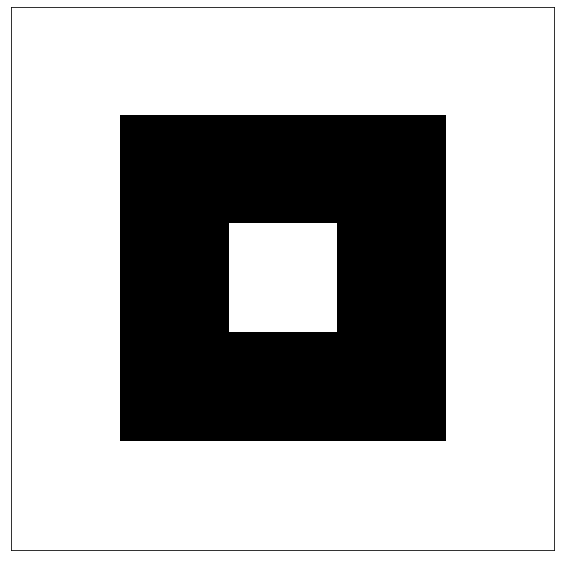

In [7]:
plt.figure(figsize=(scale, scale))
for i in range(1):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(first_image)
print(first_image.size)

In [11]:
mass_crop_periods = numpy.array([0] ,int)
mass_crop = numpy.dtype(int)

for i in range(first_image.size[1] - (step_im - 1) * tpb):
    for i2 in range(first_image.size[0] - (step_im - 1) * lpr):
        crop_im = first_image.crop((i2, i, (i2 + step_im), (i + step_im)))
        im_array = numpy.array(crop_im, dtype=int)[:, :, 0:3]
        # first part
        if mass_crop is numpy.dtype(int):
            mass_crop = numpy.array([im_array])
        
        # left + right
        if i2 + step_im > first_image.size[0]:
            mask_lp = numpy.zeros((step_im, first_image.size[0] - i2, 3) ,int)
            crop_im = first_image.crop((0, i, i2 + step_im - first_image.size[0], (i + step_im)))
            mask_lp = numpy.append(mask_lp, numpy.array(crop_im, dtype=int)[:, :, 0:3], 1)
            im_array += mask_lp
        # top + bottom
        if i + step_im > first_image.size[1]:
            mask_tp = numpy.zeros((first_image.size[1] - i, step_im , 3) ,int)
            crop_im = first_image.crop((i2, 0, (i2 + step_im), i + step_im - first_image.size[1]))
            mask_tp = numpy.append(mask_tp, numpy.array(crop_im, dtype=int)[:, :, 0:3], 0)
            im_array += mask_tp
        # t+b & l+r
        if i + step_im > first_image.size[1] and i2 + step_im > first_image.size[0]:
            mask_lp = numpy.zeros((i + step_im - first_image.size[1], first_image.size[0] - i2, 3) ,int)
            mask_tp = numpy.zeros((first_image.size[1] - i, step_im , 3) ,int)
            crop_im = first_image.crop((0, 0, i2 + step_im - first_image.size[0], i + step_im - first_image.size[1]))
            mask_lp = numpy.append(mask_lp, numpy.array(crop_im, dtype=int)[:, :, 0:3], 1)
            mask_tp = numpy.append(mask_tp, mask_lp, 0)
            im_array += mask_tp
        
        # 0%
        if not (mass_crop == im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # flip            
        flip_im_array = numpy.flip(im_array, 0)
        if not (mass_crop == flip_im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [flip_im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == flip_im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # 90%
        im_array = numpy.rot90(im_array)
        if not (mass_crop == im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # flip
        flip_im_array = numpy.flip(im_array, 0)
        if not (mass_crop == flip_im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [flip_im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == flip_im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # 180%
        im_array = numpy.rot90(im_array)
        if not (mass_crop == im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # flip
        flip_im_array = numpy.flip(im_array, 0)
        if not (mass_crop == flip_im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [flip_im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == flip_im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # 270%
        im_array = numpy.rot90(im_array)
        if not (mass_crop == im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == im_array).all(-1).all(-1).all(-1)).index(True)] += 1
        # flip
        flip_im_array = numpy.flip(im_array, 0)
        if not (mass_crop == flip_im_array).all(-1).all(-1).all(-1).any():
            mass_crop = numpy.append(mass_crop , [flip_im_array], 0)
            mass_crop_periods = numpy.append(mass_crop_periods, [1])
        else:
            mass_crop_periods[list((mass_crop == flip_im_array).all(-1).all(-1).all(-1)).index(True)] += 1

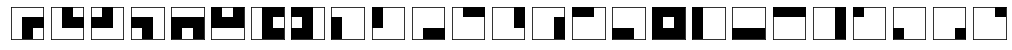

In [12]:
plt.figure(figsize=(2*scale, 2*scale))
for i in range(28*28):
    if i == len(mass_crop):
        break
    plt.subplot(28, 28, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mass_crop[i])

In [13]:
new_image_array = numpy.zeros((size[0], size[1], 3), int)
crop_im = first_image.crop((old_map_start[0], old_map_start[1], old_map_start[0] + step_im, old_map_start[1] + step_im))
im_array = numpy.array(crop_im, dtype=int)[:, :, 0:3];
index_tile = list((mass_crop == im_array).all(-1).all(-1).all(-1)).index(True)

tale_map = [[AvalibleTile(len(mass_crop)) for i in range(size[0])] for i2 in range(size[1])]
tale_map = numpy.array(tale_map)
tale_map[startpix[0]][startpix[1]].clearAT(index_tile)


In [14]:
# Painting
for i in range(tale_map.shape[1]):
    for i2 in range(tale_map.shape[0]):
        new_image_array[i][i2] = mass_crop[tale_map[i2][i].at[0]][1][1]

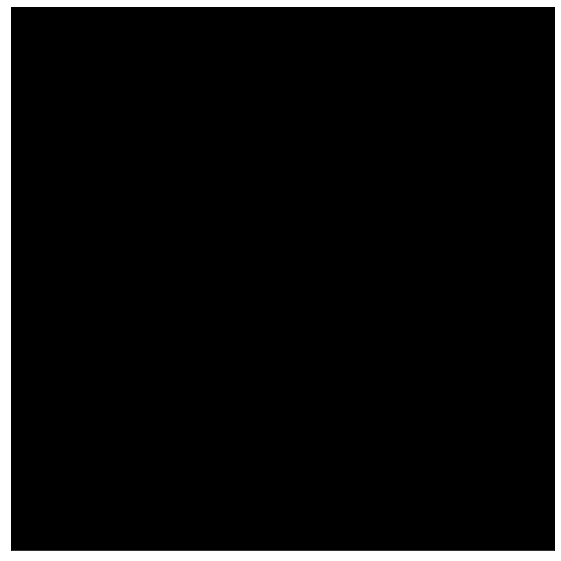

In [15]:
plt.figure(figsize=(scale, scale))
plt.xticks([])
plt.yticks([])
plt.imshow(new_image_array)